In [20]:
import numpy as np

In [21]:
raw_primary = []
raw_secondary = []

with open('RS126.data.txt', 'r') as f:
    for count, line in enumerate(f, start=1):
        if count % 2 == 0:
            raw_secondary.append(line.strip())
        else:
            raw_primary.append(line.strip())

In [22]:
print (len(raw_primary))
print (len(raw_secondary))

126
126


In [23]:
for i in range(len(raw_secondary)):
    len1 = len(raw_secondary[i])
    len2 = len(raw_primary[i])
    
    if(len1 != len2):
        print(i," ", raw_secondary[i]," ",raw_primary[i])

109   CCCCCECCCCCCCCECCHHHHHHHHHHHHHHHCCCCCHHHHHHHCCECCCCCCCCCCCCCEEEECCCEEEEEHHHHHHHHHHHHHHCCCCCCCCEEEECCCCCCECCCHHHHHHHHHHHHHHHHHHHHHHHHHHCCEEECCCCECHHHHHHHHCCCCCCEEEECCCCHHHHHHHCCEEEECCHHHHHHHHHCCCEEEECCEEEEEEEECCCCCCCCHHHHHHHHHHHHHHHHCCCEEEEEECHHHHHCCHHHHHHHHHHHHHHCCCEEECCCCHHHHHHHHHCCCHHHHHHHHCCHHHCCCCCCCCCCEEEEEECCCCCCECECCCCCCCCCEHHHHHHHHHHHCCCCEEEEEEEECCCECCHHHHHHHHHHHHHHHCCCCCCCCEEEEECCEHHHHHHHHHCCHHHHHHHCCEEECCCCCHHHCCCECCCCCCCCCCEEEEECCCCCCCCCCCCCCCEEEEECCHHHHHHHHHHCECCCCCCCCCEECCCCCEECCCCCCCCCCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCECCCCCCCCCCCCCEEEEEEEEEECCCCEHHHHECCHHHHHHCECHHHHHHHECCCCEECCCCEECCEECCCCCCEECHHHHHHHHHCCCCCEEEECCCCECECCCCCHHHHHHHHCCEEEEEECCECHHHHHHHHHCCCEEEEECCHHHHHCCCCCCEEEEECHHHCCCCCCEEEEEECCCCCEEEEEEECCCCHHHHHHHHHCCHHHHHHHCCCC   RAKVAMSHFEPHEYIRYDLLEKNIDIVRKRLNRPLTLSEKIVYGHLDDPANQEIERGKTYLRLRPDRVAMQDATAQMAMLQFISSGLPKVAVPSTIHCDHLIEAQLGGEKDLRRAKDINQEVYNFLATAGAKYGVGFWRPGSGIIHQIILENYAYPGVLLIGTDSHTPNGGGLGGICIGVGGADAVDVMAGIPWELKCPKVIGVKLTGSLSGWTSPKDVILKVAGILTVKGGTGAIV

In [24]:
raw_primary.pop(109)
raw_secondary.pop(109)
count_sec = 0
count_pri = 0
for i in range(len(raw_secondary)):
    len1 = len(raw_secondary[i])
    len2 = len(raw_primary[i])
    count_sec = count_sec + len1
    count_pri = count_pri + len2
    if(len1 != len2):
        print(i," ", raw_secondary[i]," ",raw_primary[i])
        
print("count secondary structure : ",count_sec)
print("count primary structure : ",count_pri)

count secondary structure :  22594
count primary structure :  22594


In [25]:
def split(sequence): 
    return [char for char in sequence]  

In [26]:
split_primary = []
split_secondary = []
for i in range(len(raw_primary)):
    split_primary.append(split(raw_primary[i]))
    split_secondary.append(split(raw_secondary[i]))

In [27]:
def orthogonal_pri(arg):
    switch = {
        'A' : np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'C' : np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'E' : np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'D' : np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'G' : np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'F' : np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'I' : np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'H' : np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]),
        'K' : np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]),
        'M' : np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]),
        'L' : np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]),
        'N' : np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]),
        'Q' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]),
        'P' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]),
        'S' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]),
        'R' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]),
        'T' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]),
        'W' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]),
        'V' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]),
        'Y' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
    }
    
    return switch.get(arg)

def orthogonal_sec(arg):
    switch = {
        'H' : 0,
        'C' : 1,
        'E' : 2
    }
    
    return switch.get(arg)

In [28]:
for i in range(len(split_primary)):  
    seq = split_primary[i]
    for j in range(len(seq)):
        seq[j] = orthogonal_pri(seq[j])

In [29]:
for i in range(len(split_secondary)):  
    seq2 = split_secondary[i]
    for j in range(len(seq2)):
        seq2[j] = orthogonal_sec(seq2[j])

In [30]:
def target(lis):
    Y = []
    for i in range(len(lis)):
        for j  in range(len(lis[i])):
            Y.append(lis[i][j])
    return Y

In [31]:
y_label = target(split_secondary)

In [32]:
len(y_label)

22594

In [33]:
def window_padding_data(size, sequence):
    num = int(size/2)
    zeros = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    for i in range(len(sequence)):
        for j in range(num):
            sequence[i].append(zeros)
            sequence[i].insert(0, zeros)
            
    X = []
    temp = []

    for k in range(len(sequence)):
        for l in range(len(sequence[k])-(size-1)):
            temp = sequence[k][l:l+size]
            X.append(temp)
            temp = []

    return X

In [34]:
X = window_padding_data(15,split_primary)

In [35]:
len(X)

22594

In [36]:
X = np.array(X)
y_label = np.array(y_label)
X = X.reshape(22594, 15*20)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size = 0.20)

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [52]:
svc = SVC(kernel='rbf', gamma = 0.1, C=1)
svc.fit(X_train, y_train)


SVC(C=1, gamma=0.1)

In [66]:
from sklearn.metrics import accuracy_score

In [54]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.6213764107103341

In [55]:
print(y_test[0:20])
print(y_pred[0:20])

[1 1 0 0 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 1]
[1 0 0 0 0 0 1 1 0 1 1 1 0 0 2 1 0 1 1 1]


In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

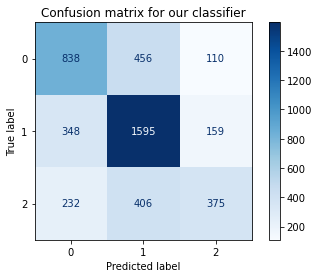

In [56]:
# Generate confusion matrix

matrix = plot_confusion_matrix(svc, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [17]:
#Check accuracy using mus musculus primary protein structure and match with results obtained from porter server

In [38]:
st=[]
st='MGWAGDAGCTPRPPIRPRPASERRVIIVLFLGLLLDLLAFTLLLPLLPGLLERHGREQDPLYGSWQRGVDWFASAIGMPAEKRYNSVLFGGLIGSAFSLLQFFSAPLTGAASDYLGRRPVMMLSLTGLAISYAVWATSRSFKAFLASRVIGGISKGNVNLSTAIVADLGSPPTRSQGMAVIGVAFSLAFTLGPMLGAFLSVEMVPWISLLFAISDMLFIFCFLPETLPQEKRASSVTLGFHTAAHLLSPLALLRFAAVTHSQDPPAEHRLRNLRRLGLVYFLYLFLFSGLEYTLSFLAHQRFQFSSLQQGKMFFFIGLTMATIQGTYARRISPGKEAAAVTRAMLLLVPAFLLIGWAHSLPTLGLGLMLYSFAAAVVVPGLSTMVSSYGSPGQKGTIMGILRSLGALGRALGPVVAASVYWLTGAQVCFTVCSALFLLPFLLLWKLKHPAETSKEE'
st

'MGWAGDAGCTPRPPIRPRPASERRVIIVLFLGLLLDLLAFTLLLPLLPGLLERHGREQDPLYGSWQRGVDWFASAIGMPAEKRYNSVLFGGLIGSAFSLLQFFSAPLTGAASDYLGRRPVMMLSLTGLAISYAVWATSRSFKAFLASRVIGGISKGNVNLSTAIVADLGSPPTRSQGMAVIGVAFSLAFTLGPMLGAFLSVEMVPWISLLFAISDMLFIFCFLPETLPQEKRASSVTLGFHTAAHLLSPLALLRFAAVTHSQDPPAEHRLRNLRRLGLVYFLYLFLFSGLEYTLSFLAHQRFQFSSLQQGKMFFFIGLTMATIQGTYARRISPGKEAAAVTRAMLLLVPAFLLIGWAHSLPTLGLGLMLYSFAAAVVVPGLSTMVSSYGSPGQKGTIMGILRSLGALGRALGPVVAASVYWLTGAQVCFTVCSALFLLPFLLLWKLKHPAETSKEE'

In [39]:

sec_st=[]

for i in range(len(st)):
    sec_st.append((st[i]))

In [40]:

for i in range(len(sec_st)):  
    sec_st[i]=orthogonal_pri(sec_st[i])

In [41]:
def window_pad(size, sequence):
    num = int(size/2)
    zeros = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    
    for j in range(num):
        sequence.append(zeros)
        sequence.insert(0, zeros)
            
    X = []
    temp = []

    
    for l in range(len(sequence)-(size-1)):
        temp = sequence[l:l+size]
        X.append(temp)
        temp = []

    return X

In [42]:
X_sm = window_pad(15,sec_st)

In [43]:
len(X_sm)

456

In [50]:
X_sm = np.array(X_sm)
X_sm = X_sm.reshape(456, 15*20)

In [53]:
y_pred = svc.predict(X_sm)

In [56]:

len(y_pred)

456

In [57]:
y_sm=[]
y_sm='CCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHCCCCCCCCHHHCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCC'

In [58]:
y_s = []
for i in range(len(y_sm)):
    y_s.append(split(y_sm[i]))

In [59]:
for i in range(len(y_s)):  
    seq2 = y_s[i]
    for j in range(len(seq2)):
        seq2[j] = orthogonal_sec(seq2[j])

In [60]:
y_l = target(y_s)


In [61]:
y_l = np.array(y_l)

In [67]:
accuracy_score( y_pred,y_l, normalize=True)

0.5899122807017544

In [68]:
print(y_l[0:25])
print(y_pred[0:25])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2]


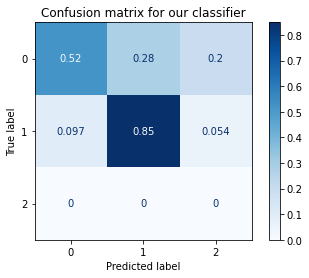

In [69]:
matrix = plot_confusion_matrix(svc, X_sm, y_l,cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()